### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Define Dataset Parameters & Storage

In [2]:
classes = 43  # Total number of traffic sign categories
data = []     # To store image data
labels = []   # To store corresponding labels

### Set Dataset Path

In [3]:
dataset_path = r"E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\dataset\train"

### Loop Through Class Folders

In [4]:
for i in range(classes):
    path = os.path.join(dataset_path, str(i))  # Path for class i
    
    # Check if path exists
    if not os.path.exists(path):
        print(f"[WARNING] Path not found: {path}")
        continue
    
    # List all images in the class folder
    images = os.listdir(path)
    
    # Process each image
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))  # Open image
            image = image.resize((30, 30))             # Resize to 30x30
            image = np.array(image)                    # Convert to array
            
            data.append(image)                         # Add image data
            labels.append(i)                           # Add label
            
        except Exception as e:
            print(f"[ERROR] Could not load image {a}: {e}")

### Convert Lists to NumPy Arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

###  Print Dataset Info

In [6]:
print(f"[INFO] Data shape: {data.shape}")
print(f"[INFO] Labels shape: {labels.shape}")

[INFO] Data shape: (39209, 30, 30, 3)
[INFO] Labels shape: (39209,)


### Data Splitting & One-Hot Encoding


In [7]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Print the shapes after split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# One-hot encode labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# **Step 2: Build a CNN model**

### Model Architecture
- **Conv2D** × 2 → (filters=32, kernel=(5,5), activation="relu")  
- **MaxPool2D** → (pool_size=(2,2))  
- **Dropout** → rate=0.25  
- **Conv2D** × 2 → (filters=64, kernel=(3,3), activation="relu")  
- **MaxPool2D** → (pool_size=(2,2))  
- **Dropout** → rate=0.25  
- **Flatten**  
- **Dense** → (256 nodes, activation="relu")  
- **Dropout** → rate=0.5  
- **Dense** → (43 nodes, activation="softmax")  


### Building and Compiling the CNN Model

In [8]:
# Building the CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Steps 3: Train and validate the model**

### Model Training

In [9]:
epochs = 15
history = model.fit(
    X_train, 
    y_train, 
    batch_size=64, 
    epochs=epochs, 
    validation_data=(X_test, y_test)
)

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.2461 - loss: 4.0932 - val_accuracy: 0.7969 - val_loss: 0.8472
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7009 - loss: 1.0291 - val_accuracy: 0.9271 - val_loss: 0.2723
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8328 - loss: 0.5705 - val_accuracy: 0.9626 - val_loss: 0.1385
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.8944 - loss: 0.3633 - val_accuracy: 0.9593 - val_loss: 0.1446
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9186 - loss: 0.2806 - val_accuracy: 0.9778 - val_loss: 0.0827
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9218 - loss: 0.2646 - val_accuracy: 0.9846 - val_loss: 0.0581
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9408 - loss: 0.2107 - val_accuracy: 0.9832 - val_loss: 0.0621
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9402 - loss: 0.2219 - 

### Model Accuracy and Loss Plots

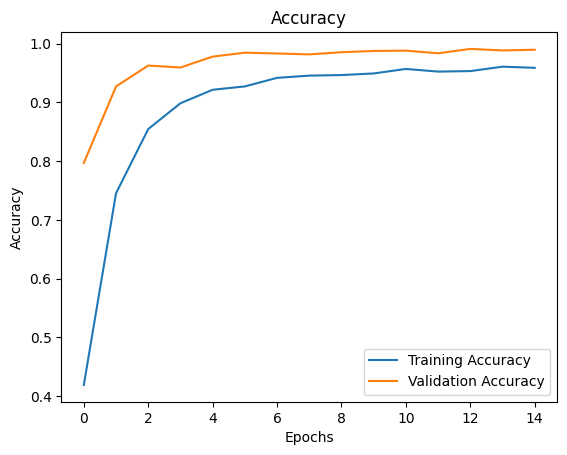

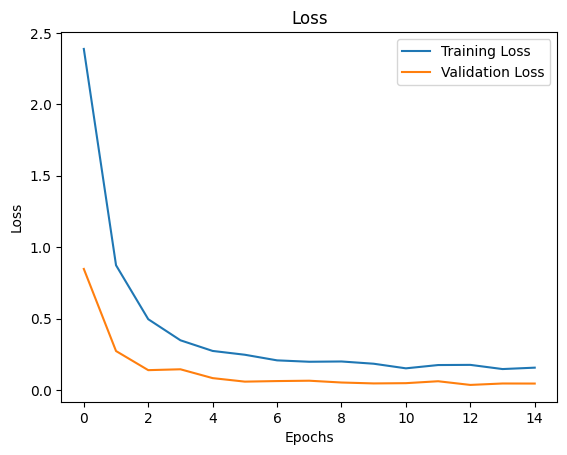

In [10]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# **Step 4: Test our model with test dataset**

### Load test data

In [11]:
csv_path = r"E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\dataset\Test.csv"
y_test = pd.read_csv(csv_path)

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

### Load and preprocess images

In [12]:
data = []
for img in imgs:
    # Construct full image path if necessary
    img_path = os.path.join(r"E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\dataset", img)
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

### Predict classes

In [13]:
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


### Calculate accuracy

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels, pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9618


In [20]:
model_save_path = r"E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\model\traffic_sign_model.h5"
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\model\traffic_sign_model.h5


In [23]:
import tensorflow as tf
model = tf.keras.models.load_model(
    r"E:\VIP\ML Stuff\ML Practice project\Sign-Recognition\backend\model\traffic_sign_model.h5"
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,253 (946.30 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)